In [1]:
#importing things
import pandas as pd
import numpy as np
import csv
import pylab as pl
import matplotlib.pyplot as plt
import copy
import scipy
from collections import OrderedDict
import seaborn as sns
from matplotlib.ticker import FixedLocator, FixedFormatter
from scipy.special import comb
from matplotlib.colors import LogNorm
from matplotlib.patches import Patch
import matplotlib as mpl
import matplotlib.lines as lines

plt.rcParams.update({'font.size': 8})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams.update({'xtick.labelsize': 7})
plt.rcParams.update({'ytick.labelsize': 7})
plt.rcParams['scatter.edgecolors'] = 'black'
plt.rcParams['axes.linewidth'] = 0.5

In [2]:

# ag, atg = '555', 'CoV555'
# effect_filename = f'{ag}_aic_6order_biochem.txt'

# ag = atg = 'S309'
# effect_filename = f'{ag}_aic_4order_biochem.txt'

# ag = atg = 'CB6'
# effect_filename = f'{ag}_aic_3order_biochem.txt'

ag = atg = 'REGN'
effect_filename = 'REGN_aic_5order_biochem.txt'

h1_linear = pd.read_table(effect_filename,
                          names=['Term',f'{ag}_Effect',f'{ag}_SE',
                                 f'{ag}_95CI_low',f'{ag}_95CI_hi'],
                          skiprows=[0,1,2],index_col=False)
first_order = h1_linear[~h1_linear["Term"].str.contains(',')]
first_order['Term'] = first_order['Term'].replace({'1':'339','2':'371','3':'373','4':'375','5':'417','6':'440','7':'446','8':'477','9':'478','10':'484','11':'493','12':'496','13':'498','14':'501','15':'505'})

/tmp/ipykernel_30166/2287495210.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_order['Term'] = first_order['Term'].replace({'1':'339','2':'371','3':'373','4':'375','5':'417','6':'440','7':'446','8':'477','9':'478','10':'484','11':'493','12':'496','13':'498','14':'501','15':'505'})


 PyMOL not running, entering library mode (experimental)
 ExecutiveLoad-Detail: Detected mmCIF
4
6
6
6
9
8
4
6
7
9
15
4
9
8
12
 Ray: render time: 2.28 sec. = 1576.1 frames/hour (2.28 sec. accum.).


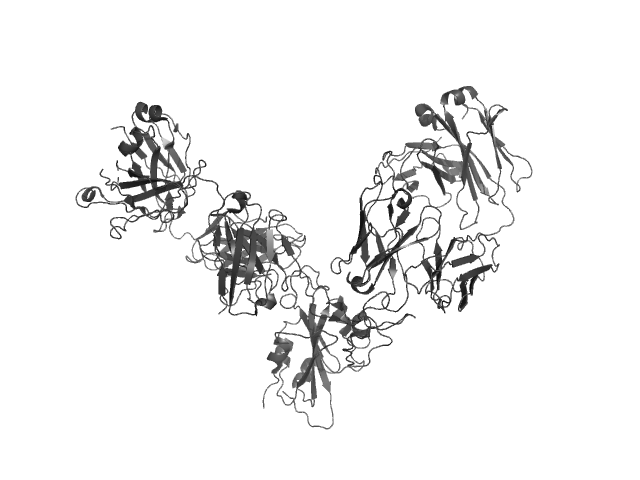

In [3]:
#pick an antigen
dct_struct = {
    '555': '7KMG',
    'S309': '6WPT',
    'CB6': '7C01',
    'REGN': '6XDG'
}

#import stuff
from pymol import cmd
#load pdb
cmd.fetch(dct_struct[ag])
#cmd.hide('everything')
##########################
#create selections for mutated residues
if ag == '555':
    chain = '((chain C) or (chain F))'
if ag == 'S309':
    chain = '((chain A) or (chain B) or (chain C))'
if ag == 'CB6':
    chain = '((chain A) or (chain B))'
if ag == 'REGN':
    chain = '((chain E))'
missing = []
for res in [339, 371,373,375,417,440,446,477,478,484,493,496,498,501,505]:
    mut1 = cmd.select(f'mut{res}',(f'{chain} and (resi {res})'))
    count = cmd.count_atoms(f'mut{res}')
    print(count)
    if count <= 3:
        missing.append(str(res))
mutations = ['mut339','mut371','mut373','mut375','mut417','mut440','mut446',
             'mut477','mut478','mut484','mut493','mut496','mut498','mut501','mut505']
##########################
#display
#coloring
cmd.show_as('cartoon')
cmd.color('gray30')
cmd.orient()
#save image if desired
cmd.png('/tmp/foo.png', ray=1)
from IPython.display import Image
Image(filename='/tmp/foo.png')

In [4]:
missing

[]

In [5]:
## create chimeraX command
comd = f"open {dct_struct[ag]};"

if ag == '555':
    chain_antibody = "#1/A,D,B,E"
    chain_spike = '#1/C,F'
if ag == 'S309':
    chain_antibody = "#1/D,H,E,L"
    chain_spike = "#1/A,B,C"
if ag == 'CB6':
    chain_antibody = "#1/L,D,C,H"
    chain_spike = "#1/A,B"
if ag == 'REGN':
    chain_spike = "#1/E"
    chain_antibody = "#1/A,C"
# light
for m in mutations:
    comd += f'measure buriedarea {chain_antibody} withAtoms2 {chain_spike}:{m[3:]};'
print(comd)
if ag == '555':
    result = {'339' : -3.638e-12,'371' : -3.638e-12,'373' : -3.638e-12,'375' : -3.638e-12,'417' : -7.276e-12,'440' : -7.276e-12,'446' : 1.2039,'477' : -7.276e-12,'478' : 2.2642,'484' : 279.83,'493' : 166.09,'496' : -3.638e-12,'498' : -3.638e-12,'501' : -7.276e-12,'505' : -3.638e-12}
if ag == 'CB6':
    result = {'339' : 0,'371' : 0,'373' : 3.638e-12,'375' : 0,'417' : 204.47,'440' : 20.168,'446' : 54.781,'477' : 68.791,'478' : 0,'484' : 57.971,'493' : 130.72,'496' : 2.5947,'498' : 27.63,'501' : 106.38,'505' : 204.7,}
if ag == 'S309':
    result = {'339' : 90.078,'371' : 0,'373' : 0,'375' : 0,'417' : -1.819e-12,'440' : 26.19,'446' : -1.819e-12,'477' : 0,'478' : 0,'484' : 0,'493' : 0,'496' : 0,'498' : 0,'501' : -1.819e-12,'505' : -1.819e-12,}
if ag == 'REGN':
    result = {'339' : 1.819e-12,'371' : 0,'373' : 0,'375' : 1.819e-12,'417' : 0,'440' : 66.493,'446' : 71.936,'477' : 0,'478' : 1.819e-12,'484' : 0,'493' : 1.819e-12,'496' : 0,'498' : 26.674,'501' : 6.7794,'505' : 1.819e-12,'339' : 1.819e-12}

first_order['buriedSA'] = [result[a[3:]] if a[3:] not in missing else np.nan for a in mutations]

open 6XDG;measure buriedarea #1/A,C withAtoms2 #1/E:339;measure buriedarea #1/A,C withAtoms2 #1/E:371;measure buriedarea #1/A,C withAtoms2 #1/E:373;measure buriedarea #1/A,C withAtoms2 #1/E:375;measure buriedarea #1/A,C withAtoms2 #1/E:417;measure buriedarea #1/A,C withAtoms2 #1/E:440;measure buriedarea #1/A,C withAtoms2 #1/E:446;measure buriedarea #1/A,C withAtoms2 #1/E:477;measure buriedarea #1/A,C withAtoms2 #1/E:478;measure buriedarea #1/A,C withAtoms2 #1/E:484;measure buriedarea #1/A,C withAtoms2 #1/E:493;measure buriedarea #1/A,C withAtoms2 #1/E:496;measure buriedarea #1/A,C withAtoms2 #1/E:498;measure buriedarea #1/A,C withAtoms2 #1/E:501;measure buriedarea #1/A,C withAtoms2 #1/E:505;


/tmp/ipykernel_30166/71901666.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_order['buriedSA'] = [result[a[3:]] if a[3:] not in missing else np.nan for a in mutations]


In [6]:
first_order

,Term,REGN_Effect,REGN_SE,REGN_95CI_low,REGN_95CI_hi,buriedSA
0,339,0.009747,0.336775,NaN,NaN,1.819000e-12
1,371,0.183453,0.330692,NaN,NaN,0.000000e+00
2,373,0.076060,0.341082,NaN,NaN,0.000000e+00
3,375,0.155925,0.310571,NaN,NaN,1.819000e-12
4,417,-0.024760,0.332229,NaN,NaN,0.000000e+00
5,440,-0.563149,0.315443,NaN,NaN,6.649300e+01
6,446,-0.344942,0.319284,NaN,NaN,7.193600e+01
7,477,0.064834,0.322932,NaN,NaN,0.000000e+00
8,478,0.302685,0.313292,NaN,NaN,1.819000e-12
9,484,-0.175848,0.308198,NaN,NaN,0.000000e+00


In [7]:
first_order.to_csv(f'structure_output/firstorder_summary_{atg}.csv',index=False)
upper = max(list(first_order[f'{ag}_Effect']))
lower = min(list(first_order[f'{ag}_Effect']))
first_order

,Term,REGN_Effect,REGN_SE,REGN_95CI_low,REGN_95CI_hi,buriedSA
0,339,0.009747,0.336775,NaN,NaN,1.819000e-12
1,371,0.183453,0.330692,NaN,NaN,0.000000e+00
2,373,0.076060,0.341082,NaN,NaN,0.000000e+00
3,375,0.155925,0.310571,NaN,NaN,1.819000e-12
4,417,-0.024760,0.332229,NaN,NaN,0.000000e+00
5,440,-0.563149,0.315443,NaN,NaN,6.649300e+01
6,446,-0.344942,0.319284,NaN,NaN,7.193600e+01
7,477,0.064834,0.322932,NaN,NaN,0.000000e+00
8,478,0.302685,0.313292,NaN,NaN,1.819000e-12
9,484,-0.175848,0.308198,NaN,NaN,0.000000e+00


In [8]:
#print commands for mapping onto pymol structure
print('stored.newB='+str(list(first_order["%s_Effect" % ag]))+'\nalter RBDm, b=0.0\nalter RBDm and n. CA, b=stored.newB.pop(0)\nalphatoall *,b\nspectrum b, blue_white_red, 9114m, minimum=%s, maximum=%s' % (lower,upper))

stored.newB=[0.009746590770735, 0.1834529322679561, 0.0760599253705073, 0.1559248743621064, -0.0247602727086794, -0.5631493500154713, -0.3449422346805428, 0.0648344997731366, 0.3026846360964634, -0.1758480928660889, 0.3794282166601362, 0.1143708241463506, 0.6207795584843535, 0.261070179803695, 0.1512580270944189]
alter RBDm, b=0.0
alter RBDm and n. CA, b=stored.newB.pop(0)
alphatoall *,b
spectrum b, blue_white_red, 9114m, minimum=-0.5631493500154713, maximum=0.6207795584843535


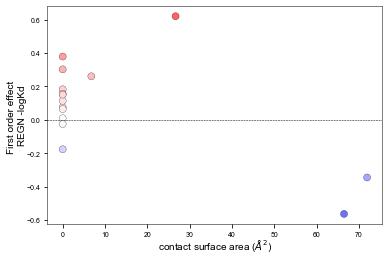

In [9]:
toplot = pd.DataFrame(pd.read_csv(f'structure_output/firstorder_summary_{atg}.csv',delimiter=','))
#H1 scatter
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

cmap = cm.get_cmap("bwr")
x=toplot['buriedSA']
y=toplot['%s_Effect' % ag]
p1=sns.scatterplot(x=x,
            y=y,
            data=toplot,
            palette="bwr",
            hue_norm=(-1,1),
            x_jitter=True,
            marker='o',
            edgecolor='black',
            linewidth=0.25,
            s=50,
            hue='%s_Effect' % ag
                  )


#sort dataframe to only label outliers
toplot_s = toplot.iloc[(-toplot['buriedSA'].abs()).argsort()].reset_index(drop=True)
# lim=4
# for line in range(0,lim):
#     if antigen=="ACE2":
#         ax.text(toplot_s.buriedSA[line], toplot_s.ACE2_Effect[line]+0.2, toplot_s.Term[line], horizontalalignment='center', fontsize=6, color='black')

#plt.title('%s' % antigen,fontsize=8,weight='bold')
plt.xlabel('contact surface area ($\AA^2$)',fontsize=10,labelpad=0)
plt.legend([],[], frameon=False)

#plt.legend(loc="upper center", bbox_to_anchor=(1.1, 1.1), ncol=1, fontsize=7,markerscale=0.5)
plt.axhline(y=0,linestyle='dashed',c='black',linewidth=0.5)
plt.ylabel(f'First order effect \n{atg} -logKd',fontsize=10,labelpad=0)
plt.savefig('images/RBD_%s_linear_BSA.png' % atg, transparent=True, dpi=300,bbox_inches='tight')

In [10]:
model = "biochem"
plotting = "pairwise"
#import kl second order effects from second order model
mut_names = ['339','371','373','375','417','440','446','477','478','484','493','496','498','501','505']

h1 = pd.read_table(effect_filename,names=['Term',f'{ag}_Effect',f'{ag}_SE','pval',f'{ag}_95CI_low',f'{ag}_95CI_hi'],
                   skiprows=[0,1,2],index_col=False)
h1['order'] = h1[['Term']].applymap(lambda x: str.count(x, ',')+1)
h1_pairwise = h1[h1['order']==2]
h1_pairwise[['Mutation 1','Mutation 2']] = h1_pairwise.Term.str.split(",",expand=True)
toplot = pd.DataFrame()
toplot = h1_pairwise[['Mutation 1','Mutation 2',f'{ag}_Effect',f'{ag}_SE',f'{ag}_95CI_low',f'{ag}_95CI_hi']].copy()
toplot['Mutation 1'] = toplot['Mutation 1'].replace({'1':'mut339','2':'mut371','3':'mut373','4':'mut375','5':'mut417','6':'mut440','7':'mut446','8':'mut477','9':'mut478','10':'mut484','11':'mut493','12':'mut496','13':'mut498','14':'mut501','15':'mut505'})
toplot['Mutation 2'] = toplot['Mutation 2'].replace({'1':'mut339','2':'mut371','3':'mut373','4':'mut375','5':'mut417','6':'mut440','7':'mut446','8':'mut477','9':'mut478','10':'mut484','11':'mut493','12':'mut496','13':'mut498','14':'mut501','15':'mut505'})
#mask = (toplot[f'{ag}_95CI_low'] <= 0) & (toplot[f'{ag}_95CI_hi'] >=0)
#toplot[f'{ag}_Effect'][mask] = 0

/tmp/ipykernel_30166/2523408101.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h1_pairwise[['Mutation 1','Mutation 2']] = h1_pairwise.Term.str.split(",",expand=True)
/tmp/ipykernel_30166/2523408101.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h1_pairwise[['Mutation 1','Mutation 2']] = h1_pairwise.Term.str.split(",",expand=True)


In [11]:
distance_log=[]
loc_muta = list(toplot['Mutation 1'])
loc_mutb = list(toplot['Mutation 2'])
epistasis = list(toplot['%s_Effect' % ag])
labels=[]
for l in range(len(loc_muta)):
    var1=loc_muta[l]
    var2=loc_mutb[l]
    label = str(var1[3:])+','+str(var2[3:])
    labels.append(label)
    if (var1[3:] in missing) or (var2[3:] in missing):
        distance_log.append(np.nan)
        
    else:
        distance=cmd.distance(None, "%s and n. CA"%var1, "%s and n. CA"%var2) #distance between alpha carbons
        distance_log.append(distance)
df_toplot=pd.DataFrame()
df_toplot['labels']=labels
df_toplot['distance']=distance_log
df_toplot['epistasis']= epistasis
df_toplot.dropna(inplace=True)
s = df_toplot.sort_values(by='epistasis',ascending=False)
s.to_csv('structure_output/2ndorder_summary%s.csv'% atg,index=False)

/home/thomas/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


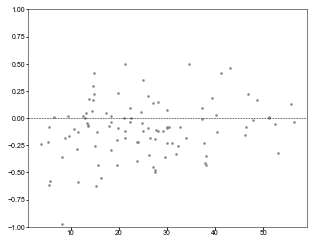

In [12]:
#sort dataframe to only label outliers
df_toplot_s = df_toplot.iloc[(-df_toplot['epistasis'].abs()).argsort()].reset_index(drop=True)

#number of outliers to label
spot = "gray"
edge = "gray"
lim = 5
%matplotlib inline
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(5, 4))
plt.tick_params(labelsize=7,length=2.5,pad=0.5)
#Create figure
# Create scatterplot. alpha controls the opacity and s controls the size.
ax = sns.scatterplot(df_toplot_s.distance, df_toplot_s.epistasis, alpha = 1,
                     linewidth=0.25,color=spot,edgecolor=edge,s=5,legend=False)

#plt.title('%s' % antigen,fontsize=8,weight='bold')
plt.axhline(y=0,linestyle='dashed',c='black',linewidth=0.5)
plt.ylim(-1,1)
ax.set_xlabel('',fontsize=7,labelpad=0)
if plotting == "sum":
    ax.set_ylabel('weighted epistasis',fontsize=7)
else:
    ax.set_ylabel('',fontsize=7,labelpad=0)

plt.savefig('images/rbd_%s_2ndorder_structure.png'% atg, transparent=True, dpi=600,bbox_inches='tight')